
# Exercise 4 Validation curve and Learning curve

The goal of this exercise is to learn to analyse the model's performance with two tools:

- Validation curve
- Learning curve

For this exercise we will use a dataset of 100k data points to give you an idea of the computation time you can expect during projects.

Preliminary:

- Using make_classification from sklearn, generate a binary data set with 100k data points and with 30 features.

```python
X, y = make_classification(n_samples=100000,
                        n_features= 30,
                        n_informative=10,
                        flip_y=0.2 )
```

1. Plot the validation curve, using all CPUs, with 5 folds. The goal is to focus again on max_depth between 1 and 20.
You may need to increase the window (example: between 1 and 50 ) if you notice that other values of max_depth could have returned better results. This may take few minutes.

I do not expect that you implement all the plot from scratch, you'd better leverage the code here:

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_validation_curve

The plot should look like this:

![alt text][logo_ex5q1]

[logo_ex5q1]: images/day5/ex5/w2_day5_ex5_q1.png "Validation curve "

The interpretation is that from max_depth=10, the train score keeps increasing but the test score (or validation score) reaches a plateau. It means that choosing max_depth = 20 may lead to have an over fitted model.

Note: Given the time computation is is not possible to plot the validation curve for all parameters. It is useful to plot it for parameters that control the over fitting the most.

More details:

- https://chrisalbon.com/machine_learning/model_evaluation/plot_the_validation_curve/

2. Let us assume the gridsearch returned `clf = RandomForestClassifier(max_depth=12)`. Let's check if the models underfits, overfit or fits correctly. Plot the learning curve. These two ressources will help you a lot to understand how to analyse the learning curves and how to plot them:

- https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html#sphx-glr-auto-examples-model-selection-plot-learning-curve-py

- **Re-use the function in the second resource**, change the cross validation to a classic 10-folds, run the learning curve data computation on all CPUs and plot the three plots as shown below.

![alt text][logo_ex5q2]

[logo_ex5q2]: images/day5/ex5/w2_day5_ex5_q2.png "Learning curve "

- **Note Plot Learning Curves**: The learning curves is detailed in the first resource.

- **Note Plot Scalibility of the model**: This plot shows the relationship between the time to train the model and the number of rows in the data. In that case the relationship is linear.

- **Note Performance of the model**: This plot shows wether it worths increasing the training time by adding data to increase the score. It would worth to add data to increase the score if the curve hasn't reach a plateau yet. In that case, increasing the training time by 10 units increases the score by less than 0.001.


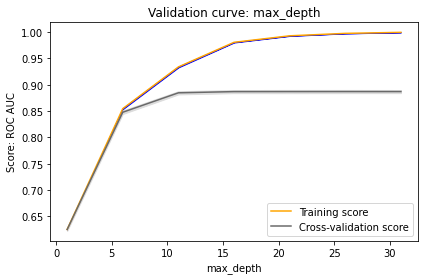

In [23]:
from sklearn.datasets import fetch_california_housing
import numpy as np
from sklearn.metrics import SCORERS
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=100000,
                        n_features= 30,
                        n_informative=10,
                        flip_y=0.2 )

# 1.
# parameters = {'n_estimators':[10, 50, 75],
#             'max_depth':[4, 7, 10]}
# 
# rf = RandomForestRegressor()
# gridsearch = GridSearchCV(rf,
#                         parameters,
#                         cv = 5,
#                         n_jobs=-1,
#                         scoring='neg_mean_squared_error')
# 
# gridsearch.fit(X_train, y_train)
param_range = np.arange(1, 35, 5)

# output the graph
# Calculate accuracy on training and test set using range of parameter values
train_scores, test_scores = validation_curve(RandomForestRegressor(), 
                                             X, 
                                             y,                                                                                               param_name="max_depth",
                                             param_range=param_range,
                                             cv=5, 
                                             scoring="roc_auc", 
                                             n_jobs=-1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="orange")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="blue")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation curve: max_depth")
plt.xlabel("max_depth")
plt.ylabel("Score: ROC AUC")
plt.tight_layout()
plt.legend(loc="best")
plt.show()